**Cálculadora de tensiones máximas en perfiles cuadrados y doble-T**
------------------------------------------------------------------------------
***

**Cálculo de tensiones máximas en la sección**

> Se considera una sección en forma de doble-T.

> Para calcular $\sigma_n$ y $\tau$ en la sección, será necesario especificar el momento flector y cortante, $m_f$ y $v_y$ respectivamente, así como la geometría del perfil: parámetros $h$, $b$, $bb$, $e$ y $e1$, en mm.

>*Nota: Para conseguir una sección rectangular basta con hacer $B=bb=e$ e imponer el espesor del ala $e1=0$.

El centro de gravedad del perfil está en (xc,yc)= 0.0 25.0
El momento de inercia de la sección respecto del eje z es= 14009.333333333334 cm^4


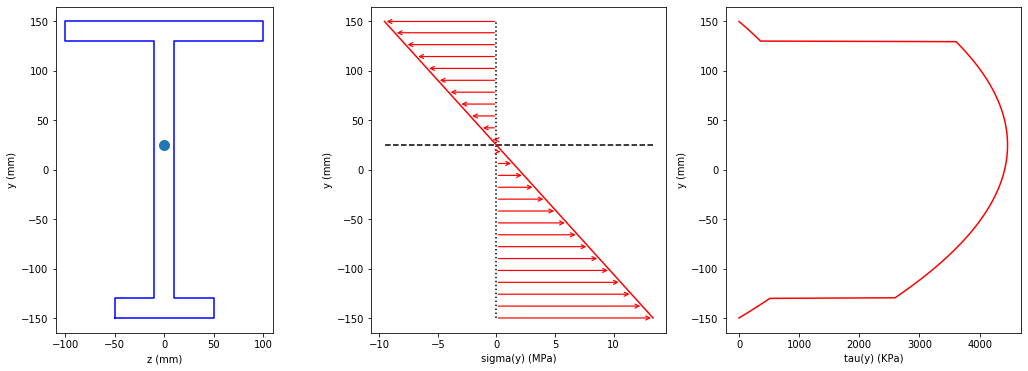

In [ ]:
#-------------------------------------------------------------------------------------#
# CENTRO UNIVERSITARIO DE LA DEFENSA 
# Resistencia de Materiales 19/20
# Este código permite calcular tensiones máximas en perfiles cuadrados y doble-T
#-------------------------------------------------------------------------------------#

from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

#-------------------------------------------------------------------------------------#
#-----------------------------------Datos de entrada----------------------------------#
#-------------------------------------------------------------------------------------#

# momento flector 
mf= 10694.48; #N*m   
# cortante
vy= 21937.5; #N   
    
    
h=300 #altura total en mm
b=200 #anchura en mm
e=20 #espesor del alma en mm
e1=20 #espesor del ala en mm

# en el caso de querer definir una anchura b distinta en la base
bb = 100;
    


#-------------------------------------------------------------------------------------#
#------------------------------Definición de funciones--------------------------------#
#-------------------------------------------------------------------------------------#
    
#--------------------------------------Ley de Navier----------------------------------#
def tensionNa(y,M,I,Yc):        
    return  -(y-Yc)*M/I*1000 
#-------------------------------------------------------------------------------------#


#------------------------------------Ley de Colignon----------------------------------#
def tensionCol(y,V,I,Yc):        
    ymax=h/2
    ymin=-h/2
    y1=ymax-e1
    y2=ymin+e1
    if y>y1:
        return V*Qest(y,Yc)/(I*b)*1000  
    elif y<y1 and y>y2:
        return V*Qest(y,Yc)/(I*e)*1000 
    else: #y<y2
        return V*Qest(y,Yc)/(I*bb)*1000 
#-------------------------------------------------------------------------------------#

#------------------------------------Momento estático---------------------------------#
def Qest(y,Yc):
    ymax=h/2-Yc
    ymin=-h/2-Yc
    y1=ymax-e1
    y2=ymin+e1
    ya=y-Yc
    if ya>y1:
        return b*(ymax**2.0-ya**2.0)/2
    elif ya<y1 and ya>y2:
        return b*(ymax**2.0-y1**2.0)/2 + e*(y1**2.0-ya**2.0)/2
    else: #y<y2
        return b*(ymax**2.0-y1**2.0)/2 + e*(y1**2.0-y2**2.0)/2 + bb*(y2**2.0-ya**2.0)/2
#-------------------------------------------------------------------------------------#

#-------------------------------------------------------------------------------------#
#----------------------------------------Cálculo--------------------------------------#
#-------------------------------------------------------------------------------------#

# Se genera la geometría del perfil para dibujarla
nopto=13 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)
xx=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar
ff=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar

xx[0]=-bb/2
ff[0]=-h/2
xx[1]=-bb/2
ff[1]=-h/2+e1
xx[2]=-e/2
ff[2]=-h/2+e1
xx[3]=-e/2
ff[3]=h/2-e1
xx[4]=-b/2
ff[4]=h/2-e1
xx[5]=-b/2
ff[5]=h/2

for i in range(6,nopto-1):                 # Loop!! La i toma valores en el intervalo [6,nopto-1) (El último valor no se toma)     
    j=i-6
    xx[i] = - xx[5-j]
    ff[i] =   ff[5-j]

xx[12]=xx[0]
ff[12]=ff[0]

# primero se calculan las areas de las 3 partes: ala inferior (1), alma (2) y ala superior (3)
A1=bb*e1
A2=e*(h-2*e1)
A3=b*e1

# y las posiciones de sus c.d.g. 
d1=-h/2+e1/2
d2= 0.0
d3=h/2-e1/2

# se calcula el c.d.g. del perfil
xc=0.0
yc=(A1*d1+ A2*d2 + A3*d3)/(A1+A2+A3) 

print("El centro de gravedad del perfil está en (xc,yc)=",xc,yc)


#------------------ Momento de inercia utilizando Tª Steiner --------------------#

# primero, se calculan inercias de las 3 partes: ala inferior (1), alma (2) y ala superior (3)
I1=bb*e1**3/12
I2=e*(h-2*e1)**3/12
I3=b*e1**3/12

# luego se trasladan al c.d.g del perfil utilizando Tª de Steiner
I1=I1+A1*(yc-d1)**2
I2=I2+A2*(yc-d2)**2
I3=I3+A3*(yc-d3)**2

# y se calcula el momento de inercia total
It=I1+I2+I3

print("El momento de inercia de la sección respecto del eje z es=",It/10000,"cm^4")



#----------------------------------- Tensiones ---------------------------------#

Ymin= -h/2 ; Ymax=h/2; nopto=500 # (Ymin,Ymax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
yy=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar\n",
ss=np.zeros((nopto,1)) 
tt=np.zeros((nopto,1))

for i in range(0,nopto):                 # Loop!! La i toma valores en el intervalo [0,nopto) (El último valor no se toma)     \n",
    yy[i] = Ymin+i*(Ymax-Ymin)/(nopto-1) 
    ss[i]=tensionNa(yy[i],mf,It,yc)
    tt[i]=tensionCol(yy[i],vy,It,yc)

    
    
#----------------------------------- Figuras -----------------------------------#

filename="Nombre de la función"
fig, (ax,ax2,ax3) = plt.subplots(1,3,figsize=(18, 6))   
                          
ax.set_aspect('equal', adjustable='box')

ax.plot(xx,ff, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot(xc,yc, 'o', markersize=10)
ax.set_xlabel("z (mm)") # Nombre y unidades del eje x
ax.set_ylabel("y (mm)") # Nombre y unidades del eje y


ax2.set_xlabel("sigma(y) (MPa)") # Nombre y unidades del eje  x
ax2.set_ylabel("y (mm)") # Nombre y unidades del eje y
ax2.plot((ss[0],ss[nopto-1]),(yc,yc), color="black", linestyle="--") 
ax2.plot((0,0),(-h/2,h/2), color="black", linestyle=":") 
ax2.plot(ss,yy, color="red",linestyle="-") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.annotate("", xy=(ss[nopto-1], h/2), xytext=(0.0, h/2),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})
for i in range(0,nopto,20):   # esto es un bucle para pintar flechas
    ax2.annotate("", xy=(ss[i], yy[i]), xytext=(0.0, yy[i]),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})

    
ax3.set_xlabel("tau(y) (KPa)") # Nombre y unidades del eje  x
ax3.set_ylabel("y (mm)") # Nombre y unidades del eje y
ax3.plot(tt,yy, color="red",linestyle="-") # Se le dice a Python, ¡¡¡pinta f(x)!!!
